In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
dataset = pd.read_csv('./datasets/CollegePlacement.csv')
dataset.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
# encoding for Internship_Experience
dataset['Internship_Experience'] = dataset['Internship_Experience'].map({'No':0,'Yes':1})

In [7]:
# encoding for Placement
dataset['Placement'] = dataset['Placement'].map({'Yes':1,'No':0})

In [8]:
dataset.head(5)

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  int64  
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [10]:
# dropping the column 
dataset = dataset.drop(['College_ID'],axis=1)

In [11]:
dataset.head(3)

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0


In [ ]:
# Here we can notice that output is in Yes or no so let's use to Logistic regression here

In [15]:
# let's seperate the x and y features
x = dataset.drop(['Placement'],axis=1)
y = dataset['Placement']

In [18]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [19]:
x_test.shape,x_train.shape

((2000, 8), (8000, 8))

In [20]:
# check the correlation
x_train.corr()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
IQ,1.000000,-0.001372,-0.004178,-0.000276,-0.000645,-0.010716,-0.010093,0.014709
Prev_Sem_Result,-0.001372,1.000000,0.980738,0.004071,-0.014432,0.003075,-0.014432,0.008237
CGPA,-0.004178,0.980738,1.000000,0.008644,-0.014569,0.004655,-0.016075,0.010357
Academic_Performance,-0.000276,0.004071,0.008644,1.000000,0.024154,0.021131,-0.016451,-0.011546
Internship_Experience,-0.000645,-0.014432,-0.014569,0.024154,1.000000,0.004007,-0.015735,-0.014269
Extra_Curricular_Score,-0.010716,0.003075,0.004655,0.021131,0.004007,1.000000,0.006082,-0.001710
Communication_Skills,-0.010093,-0.014432,-0.016075,-0.016451,-0.015735,0.006082,1.000000,-0.006394
Projects_Completed,0.014709,0.008237,0.010357,-0.011546,-0.014269,-0.001710,-0.006394,1.000000


<Axes: >

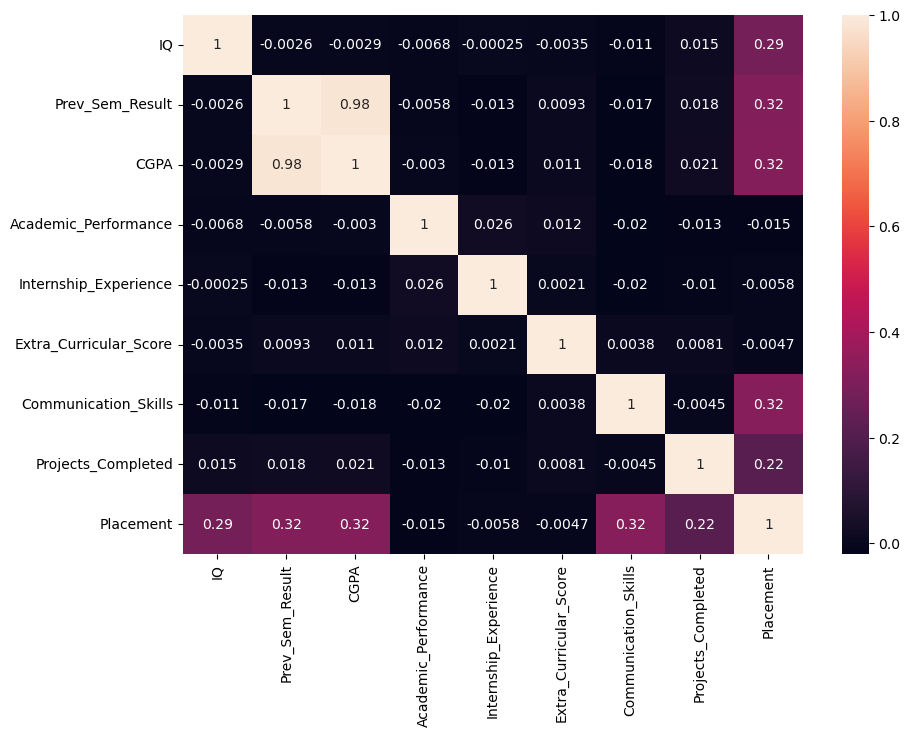

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(),annot=True)

In [29]:
# if any feature have high corelation then remove it
def hight_corrfeature(dataset,threshold):
    col_rel =set()
    corr_metrix = dataset.corr()
    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if abs(corr_metrix.iloc[i,j])>threshold:
                col_rel.add(corr_metrix.columns[j])
    return col_rel

'IQ'

In [30]:
column = hight_corrfeature(dataset,0.85)
column

{'Prev_Sem_Result'}

In [31]:
# so let's remove the this feature Prev_Sem_Result
x_train = x_train.drop(['Prev_Sem_Result'],axis=1)
x_test = x_test.drop(['Prev_Sem_Result'],axis=1)

In [32]:
# now standardize the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [34]:
# now traing the logistic regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_scaled,y_train)
y_pred = logistic_regression.predict(x_test_scaled)
f_one_score = f1_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(f"F1 score:{f_one_score}")
print(f"Accuracy:{accuracy}")

F1 score:0.6700680272108843
Accuracy:0.903


In [ ]:
# Accuracy shows the model looks good on paper.
# F1 reveals the model might still miss a fair number of positive cases (students who should pass).